In [35]:
import os
import matplotlib.pyplot as plt
import re
from PIL import Image
import numpy as np
import pickle

# Selecting only original images

In [27]:
incorrect_path = '../input/face-mask-detectormask-not-mask-incorrect-mask/dataset/incorrect_mask'
mask_path = '../input/face-mask-detectormask-not-mask-incorrect-mask/dataset/with_mask'
no_mask_path = '../input/face-mask-detectormask-not-mask-incorrect-mask/dataset/without_mask'

paths = [incorrect_path, mask_path, no_mask_path]
regex = ['incorrect.+', '[0-9]+-with.+', '^[0-9]+.+']
label = ['incorrect', 'with_mask', 'without_mask']

In [30]:
def get_data(path, regex, label):
    names = os.listdir(path)
    print('\nFound', len(names), 'images')
    regex = re.compile(regex)
    names = list(filter(regex.match, names))
    print('Selected', len(names), 'images\n')
    
    images = []
    
    for i,name in enumerate(names):
        if i % 100 == 0:
            print(i, 'from', len(names))
        
        image_path = path + '/' + name
        image = Image.open(image_path)
        image = np.array(image)
        images.append(image)
        
    labels = [label for i in range(len(names))]
    
    return images, labels

In [31]:
all_images = []
all_labels = []

for path, reg, lab in zip(paths, regex, label):
    images, labels = get_data(path, reg, lab)
    all_images += images
    all_labels += labels


Found 703 images
Selected 101 images

0 from 101
100 from 101

Found 690 images
Selected 408 images

0 from 408
100 from 408
200 from 408
300 from 408
400 from 408

Found 686 images
Selected 408 images

0 from 408
100 from 408
200 from 408
300 from 408
400 from 408


# Checking class sizes

In [32]:
np.unique(all_labels, return_counts=True)

(array(['incorrect', 'with_mask', 'without_mask'], dtype='<U12'),
 array([101, 408, 408]))

# Dataset preview

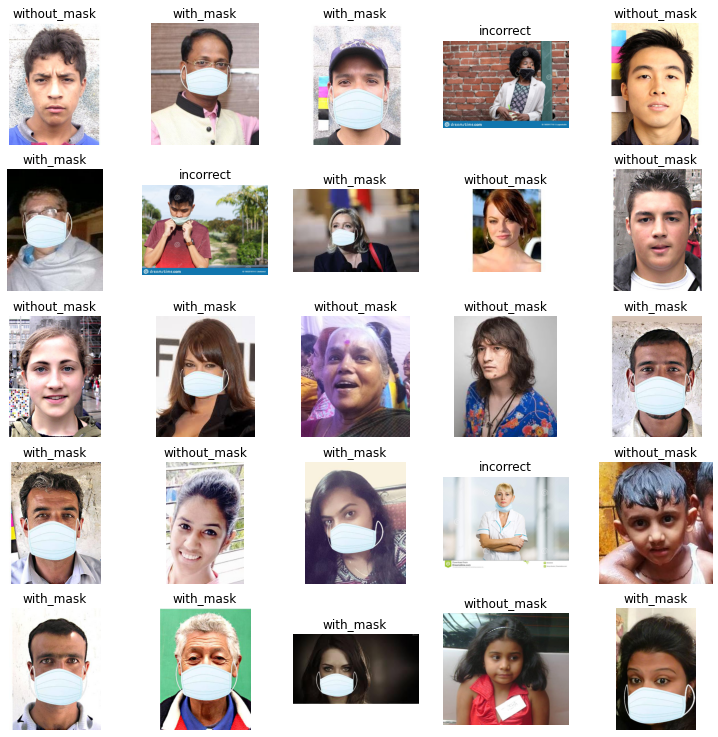

In [33]:
n = 25

random_indices = np.random.choice(len(all_labels), size=n, replace=False)
plt.figure(figsize=(13,13))
for i, idx in enumerate(random_indices):
    image = all_images[idx]
    label = all_labels[idx]
    
    plt.subplot(5, 5, i+1)
    plt.imshow(image)
    plt.title(label)
    plt.axis('off')
plt.show()

# Saving the dataset to a file

In [36]:
with open('FaceMaskDetector.pkl', 'wb') as file:
    dataset = {'images':all_images, 'labels':all_labels}
    pickle.dump(dataset, file)